In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [4]:
# Base de dados
path = kagglehub.dataset_download("solomonameh/spotify-music-dataset")
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
print("Path to dataset files:", path)
os.listdir(path)

100%|██████████| 573k/573k [00:00<00:00, 84.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/solomonameh/spotify-music-dataset/versions/1


['low_popularity_spotify_data.csv', 'high_popularity_spotify_data.csv']

In [5]:
df_high_popular = pd.read_csv(path + '/high_popularity_spotify_data.csv')
df_low_popular = pd.read_csv(path + '/low_popularity_spotify_data.csv')

In [6]:
#Verificando a quantidade de linhas do arquivo
num_linhas_hpop = df_high_popular.shape[0]
print(f"O dataset com alta popularidade possui {num_linhas_hpop} linhas.")

num_linhas_lpop = df_low_popular.shape[0]
print(f"O dataset com baixa popularidade possui {num_linhas_lpop} linhas.")

O dataset com alta popularidade possui 1686 linhas.
O dataset com baixa popularidade possui 3145 linhas.


In [8]:
# Verificando a quantidade de valores nulos por coluna
df_high_popular.isnull().sum()

,0
energy,0
tempo,0
danceability,0
playlist_genre,0
loudness,0
liveness,0
valence,0
track_artist,0
time_signature,0
speechiness,0


## Analise do arquivo de alta popularidade:

In [10]:
# Verificando o tipo de cada coluna
df_high_popular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    1686 non-null   float64
 1   tempo                     1686 non-null   float64
 2   danceability              1686 non-null   float64
 3   playlist_genre            1686 non-null   object 
 4   loudness                  1686 non-null   float64
 5   liveness                  1686 non-null   float64
 6   valence                   1686 non-null   float64
 7   track_artist              1686 non-null   object 
 8   time_signature            1686 non-null   int64  
 9   speechiness               1686 non-null   float64
 10  track_popularity          1686 non-null   int64  
 11  track_href                1686 non-null   object 
 12  uri                       1686 non-null   object 
 13  track_album_name          1685 non-null   object 
 14  playlist

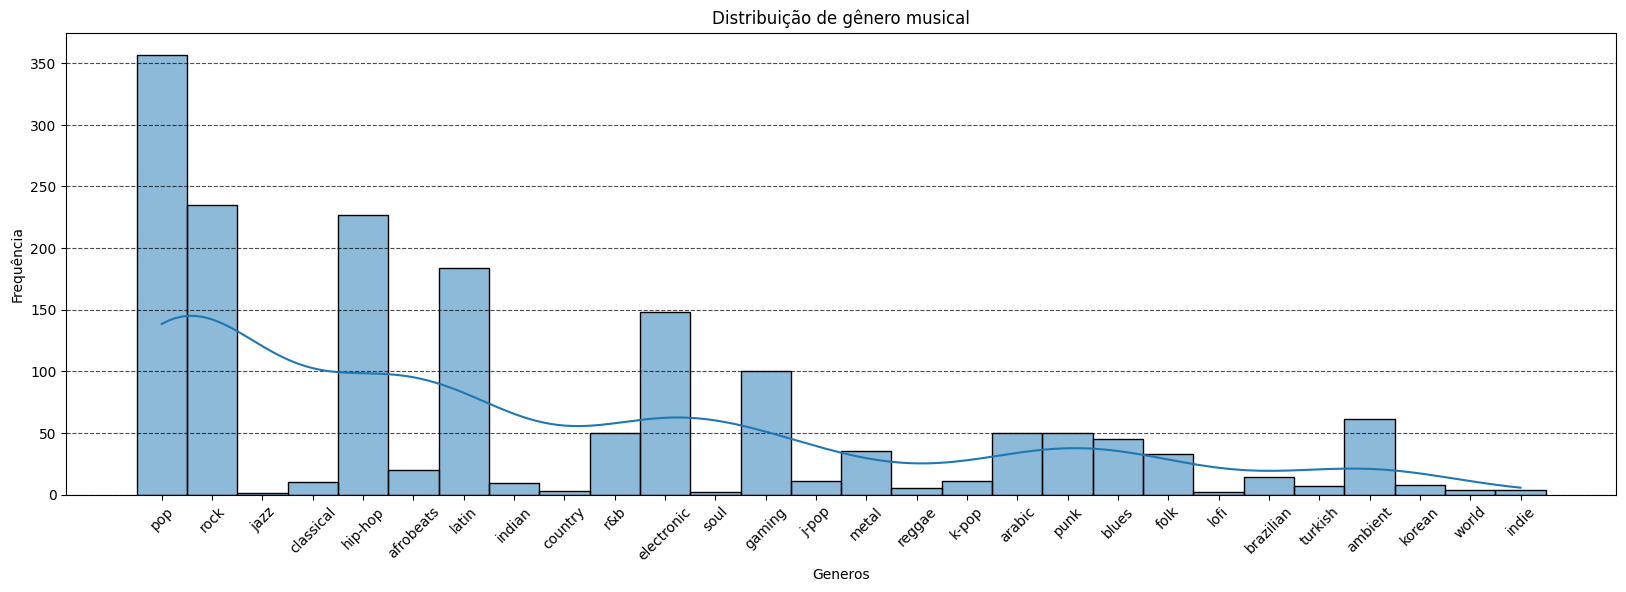

In [45]:
# Gráfico dos generos músicas
plt.figure(figsize=(20, 6))
sns.histplot(df_high_popular['playlist_genre'], kde=True)
plt.title('Distribuição de gênero musical')
plt.xlabel('Generos')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', color='black', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

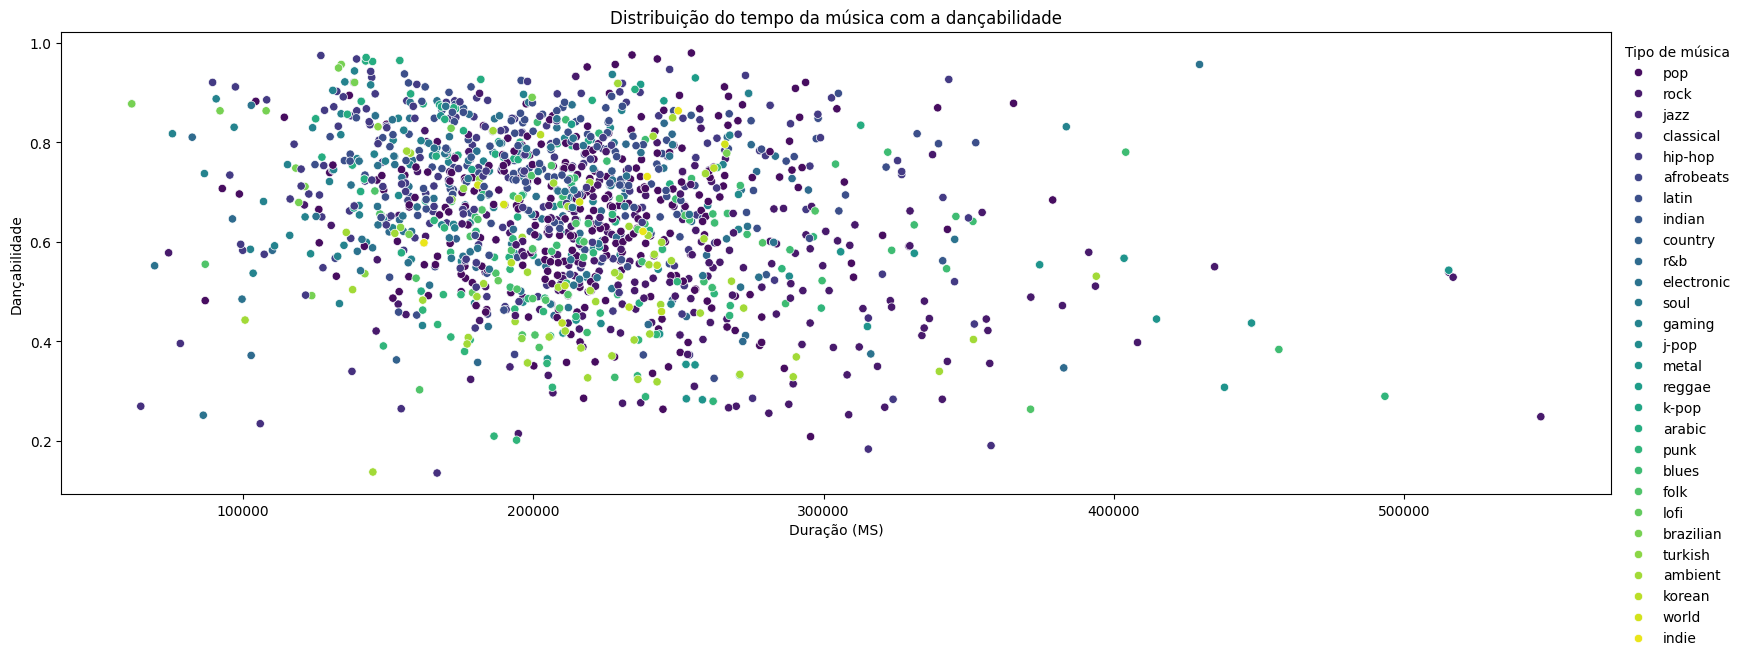

In [23]:
# Verificar a relação entre as variáveis
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df_high_popular, x='duration_ms', y='danceability', hue='playlist_genre', palette='viridis')
plt.title('Distribuição do tempo da música com a dançabilidade')
plt.xlabel('Duração (MS)')
plt.ylabel('Dançabilidade')
plt.legend(title='Tipo de música', loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=10)
plt.show()

In [26]:
print(list(df_high_popular.columns))

['energy', 'tempo', 'danceability', 'playlist_genre', 'loudness', 'liveness', 'valence', 'track_artist', 'time_signature', 'speechiness', 'track_popularity', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'instrumentalness', 'track_album_id', 'mode', 'key', 'duration_ms', 'acousticness', 'id', 'playlist_subgenre', 'type', 'playlist_id']


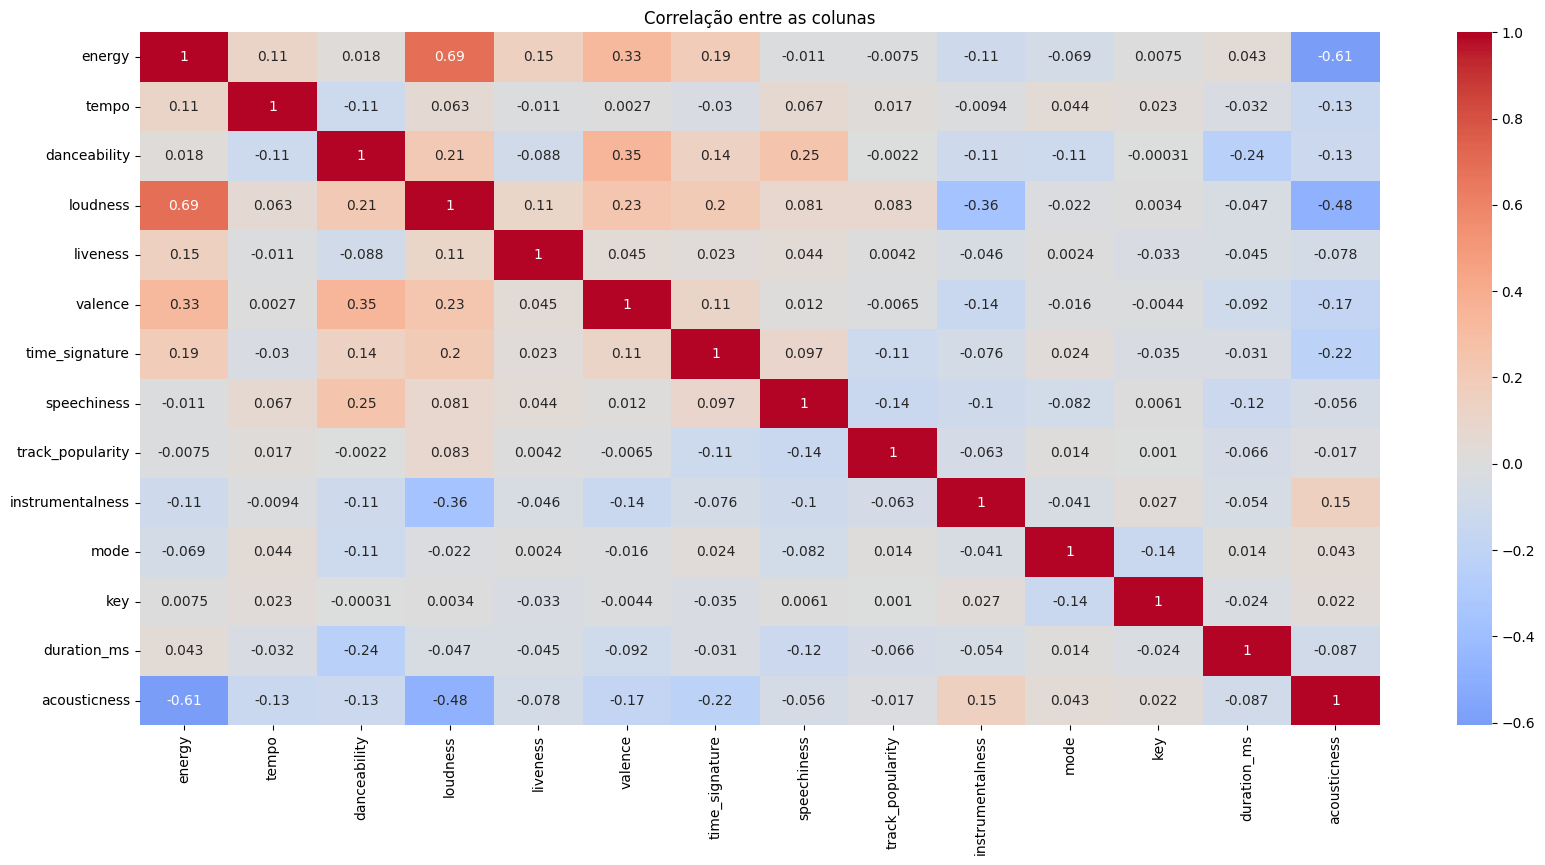

In [29]:
# Depois de limpar as colunas que não são numéricas e a data de lançamento da música, podemos criar um mapa de calor para relacionar as variáveis.
corr = df_high_popular[[
    'energy', 'tempo', 'danceability', 'loudness', 'liveness',
    'valence', 'time_signature', 'speechiness', 'track_popularity',
    'instrumentalness', 'mode',
    'key', 'duration_ms', 'acousticness',
    ]].corr()

#Exibir mapa de calor
plt.figure(figsize=(20,9))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlação entre as colunas')
plt.show()

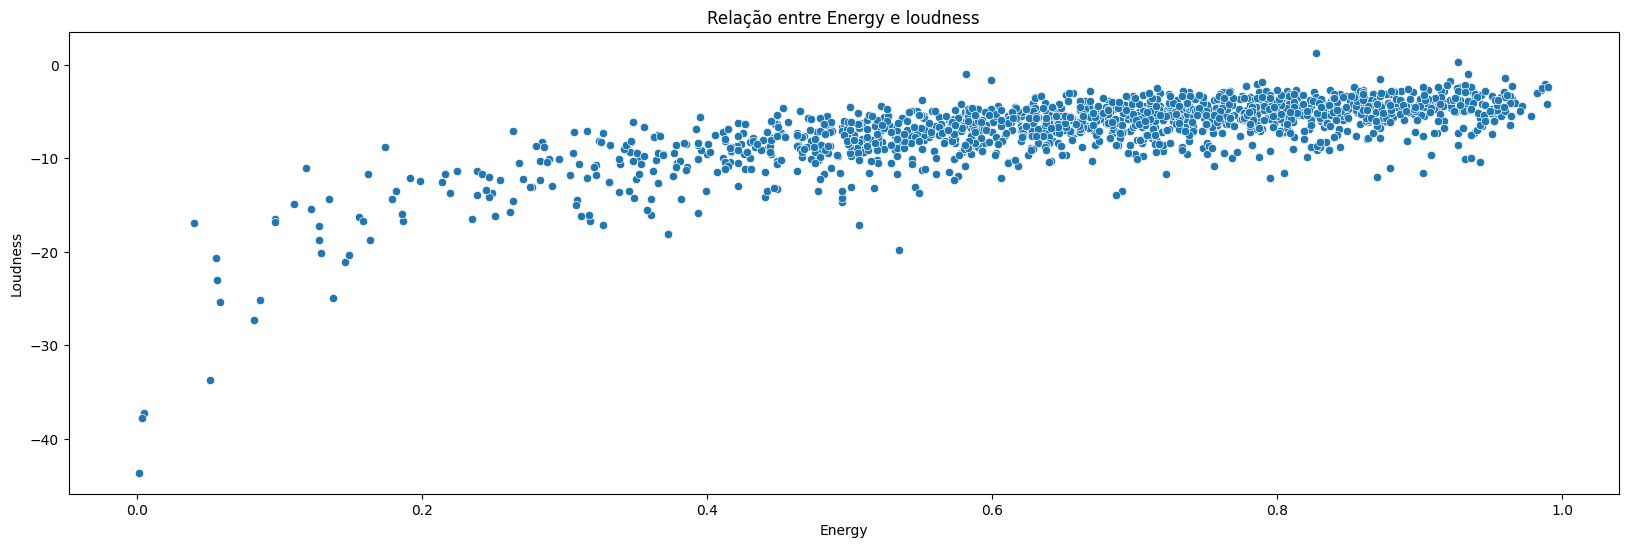

In [36]:
# Relação entre loudness e energy
plt.figure(figsize=(20, 6))
sns.scatterplot(x='energy', y='loudness', data=df_high_popular)
plt.title('Relação entre Energy e loudness')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.show()

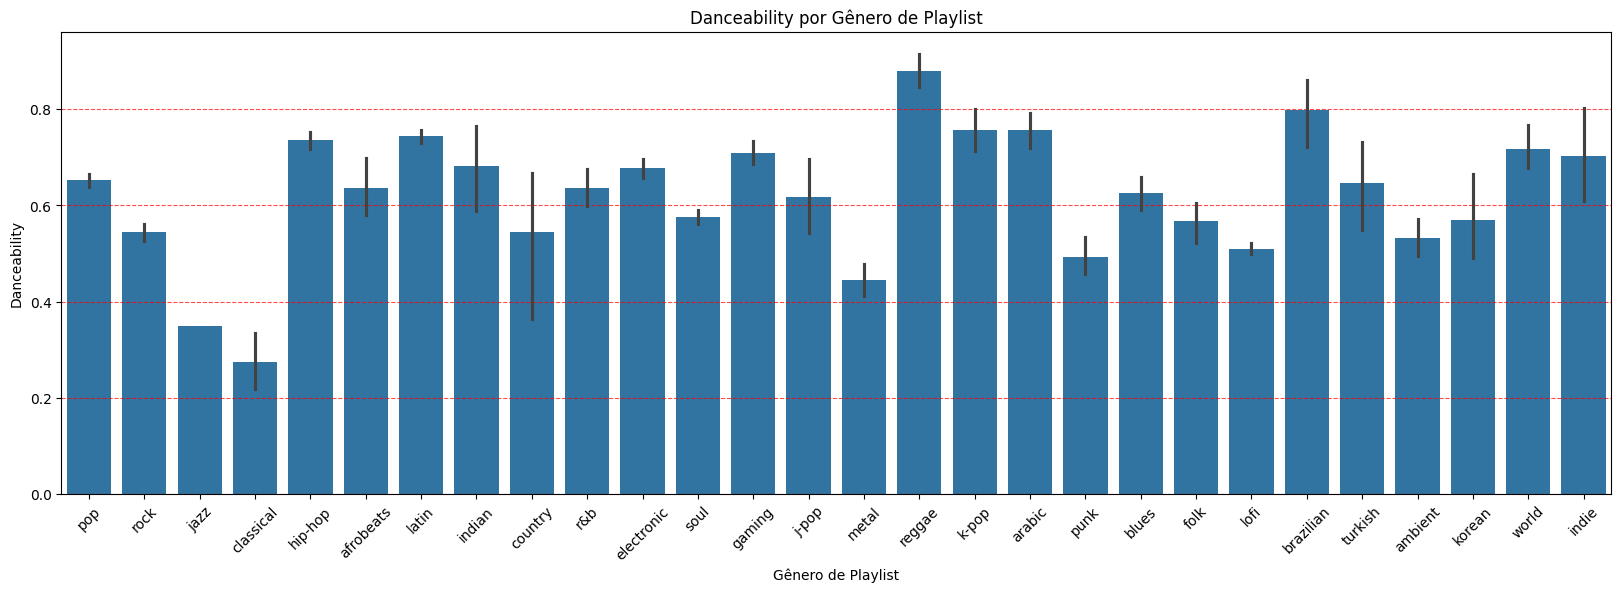

In [44]:
plt.figure(figsize=(20, 6))
sns.barplot(x='playlist_genre', y='danceability', data=df_high_popular)
plt.title('Danceability por Gênero de Playlist')
plt.xlabel('Gênero de Playlist')
plt.ylabel('Danceability')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', color='red', alpha=0.7)
plt.show()

## Analise do arquivo de baixa popularidade:


In [7]:
df_low_popular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145 entries, 0 to 3144
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time_signature            3144 non-null   float64
 1   track_popularity          3145 non-null   int64  
 2   speechiness               3144 non-null   float64
 3   danceability              3144 non-null   float64
 4   playlist_name             3145 non-null   object 
 5   track_artist              3145 non-null   object 
 6   duration_ms               3144 non-null   float64
 7   energy                    3144 non-null   float64
 8   playlist_genre            3145 non-null   object 
 9   playlist_subgenre         3145 non-null   object 
 10  track_href                3144 non-null   object 
 11  track_name                3145 non-null   object 
 12  mode                      3144 non-null   float64
 13  uri                       3144 non-null   object 
 14  type    

In [8]:
df_low_popular.isnull().sum()

,0
time_signature,1
track_popularity,0
speechiness,1
danceability,1
playlist_name,0
track_artist,0
duration_ms,1
energy,1
playlist_genre,0
playlist_subgenre,0


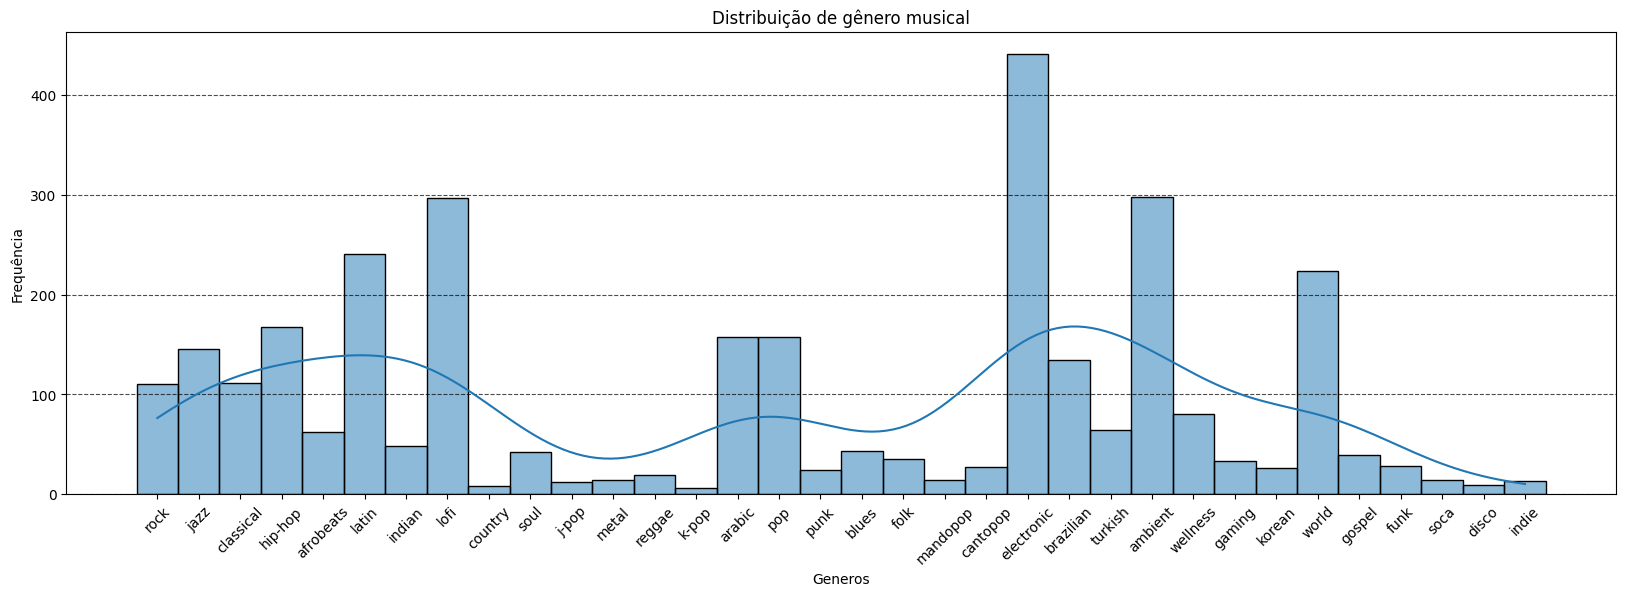

In [9]:
# Gráfico dos generos músicais
plt.figure(figsize=(20, 6))
sns.histplot(df_low_popular['playlist_genre'], kde=True)
plt.title('Distribuição de gênero musical')
plt.xlabel('Generos')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', color='black', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

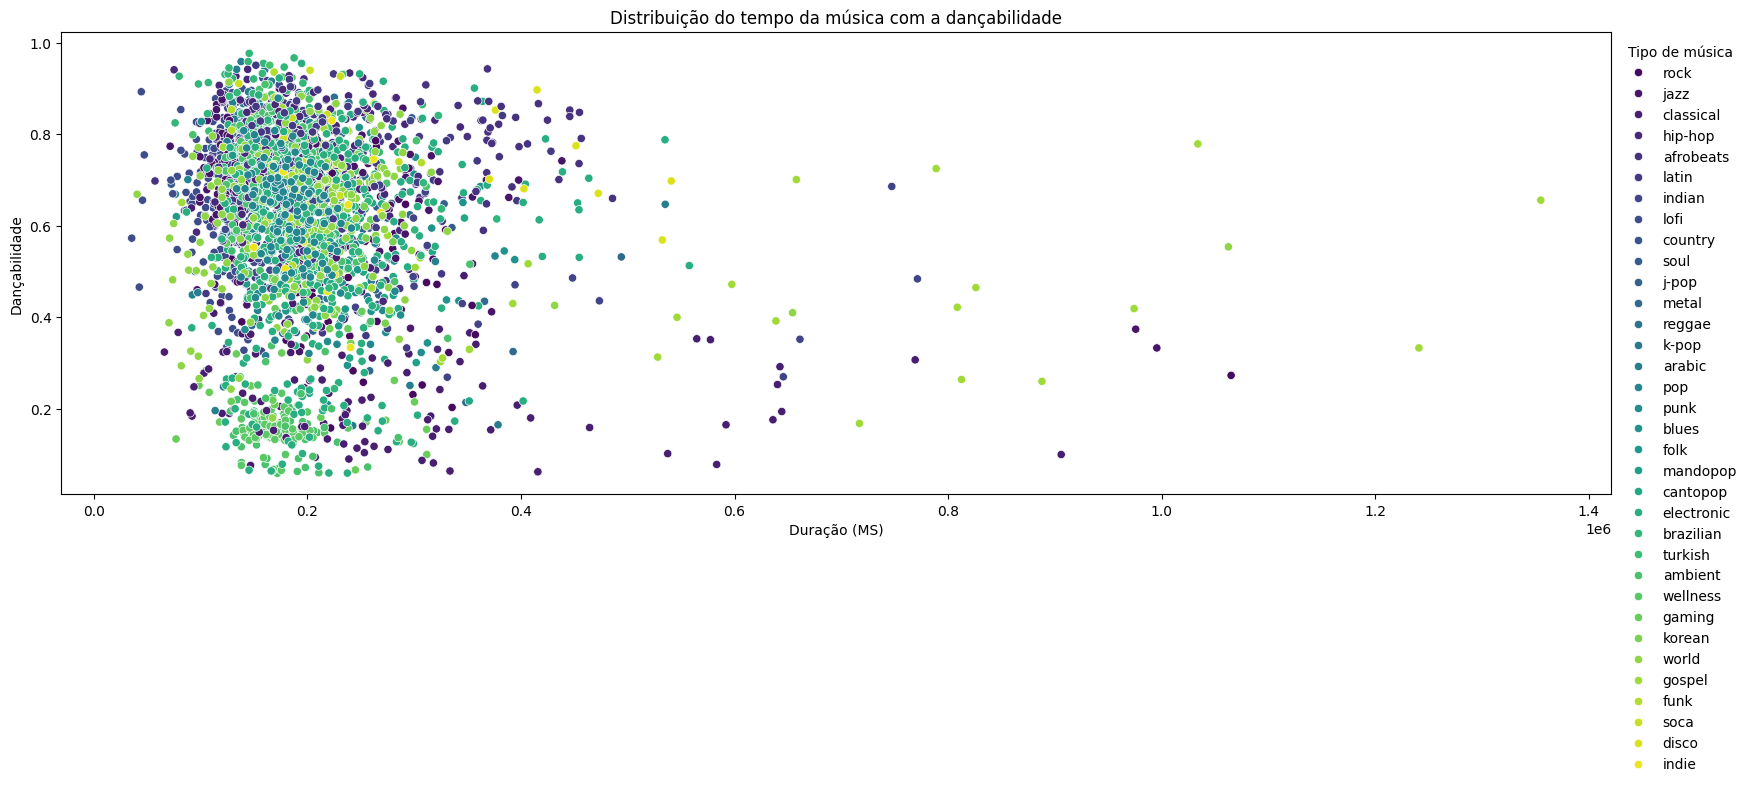

In [10]:
# Verificar a relação entre as variáveis
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df_low_popular, x='duration_ms', y='danceability', hue='playlist_genre', palette='viridis')
plt.title('Distribuição do tempo da música com a dançabilidade')
plt.xlabel('Duração (MS)')
plt.ylabel('Dançabilidade')
plt.legend(title='Tipo de música', loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=10)
plt.show()

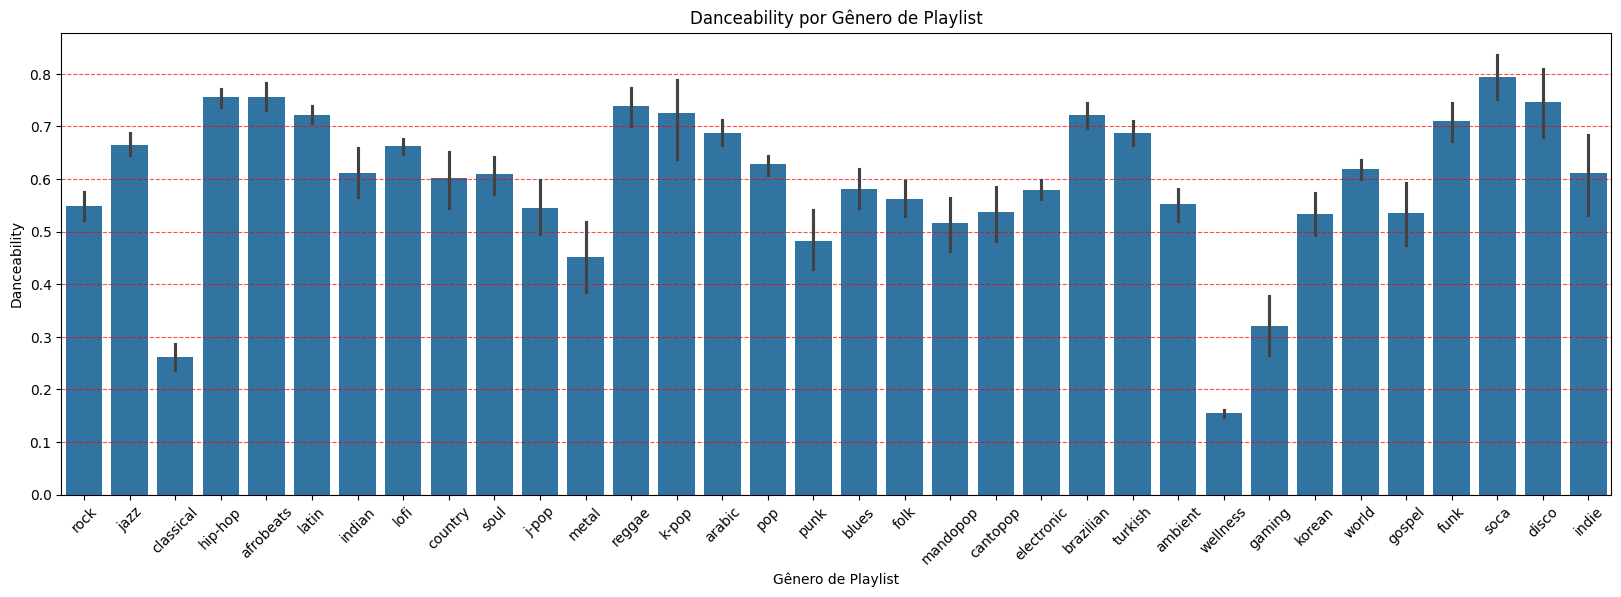

In [11]:
#As músicas mais dançaveis dividas por genero musical
plt.figure(figsize=(20, 6))
sns.barplot(x='playlist_genre', y='danceability', data=df_low_popular)
plt.title('Danceability por Gênero de Playlist')
plt.xlabel('Gênero de Playlist')
plt.ylabel('Danceability')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', color='red', alpha=0.7)
plt.show()

In [12]:
print(list(df_low_popular.columns))

['time_signature', 'track_popularity', 'speechiness', 'danceability', 'playlist_name', 'track_artist', 'duration_ms', 'energy', 'playlist_genre', 'playlist_subgenre', 'track_href', 'track_name', 'mode', 'uri', 'type', 'track_album_release_date', 'analysis_url', 'id', 'instrumentalness', 'track_album_id', 'playlist_id', 'track_id', 'valence', 'key', 'tempo', 'loudness', 'acousticness', 'liveness', 'track_album_name']


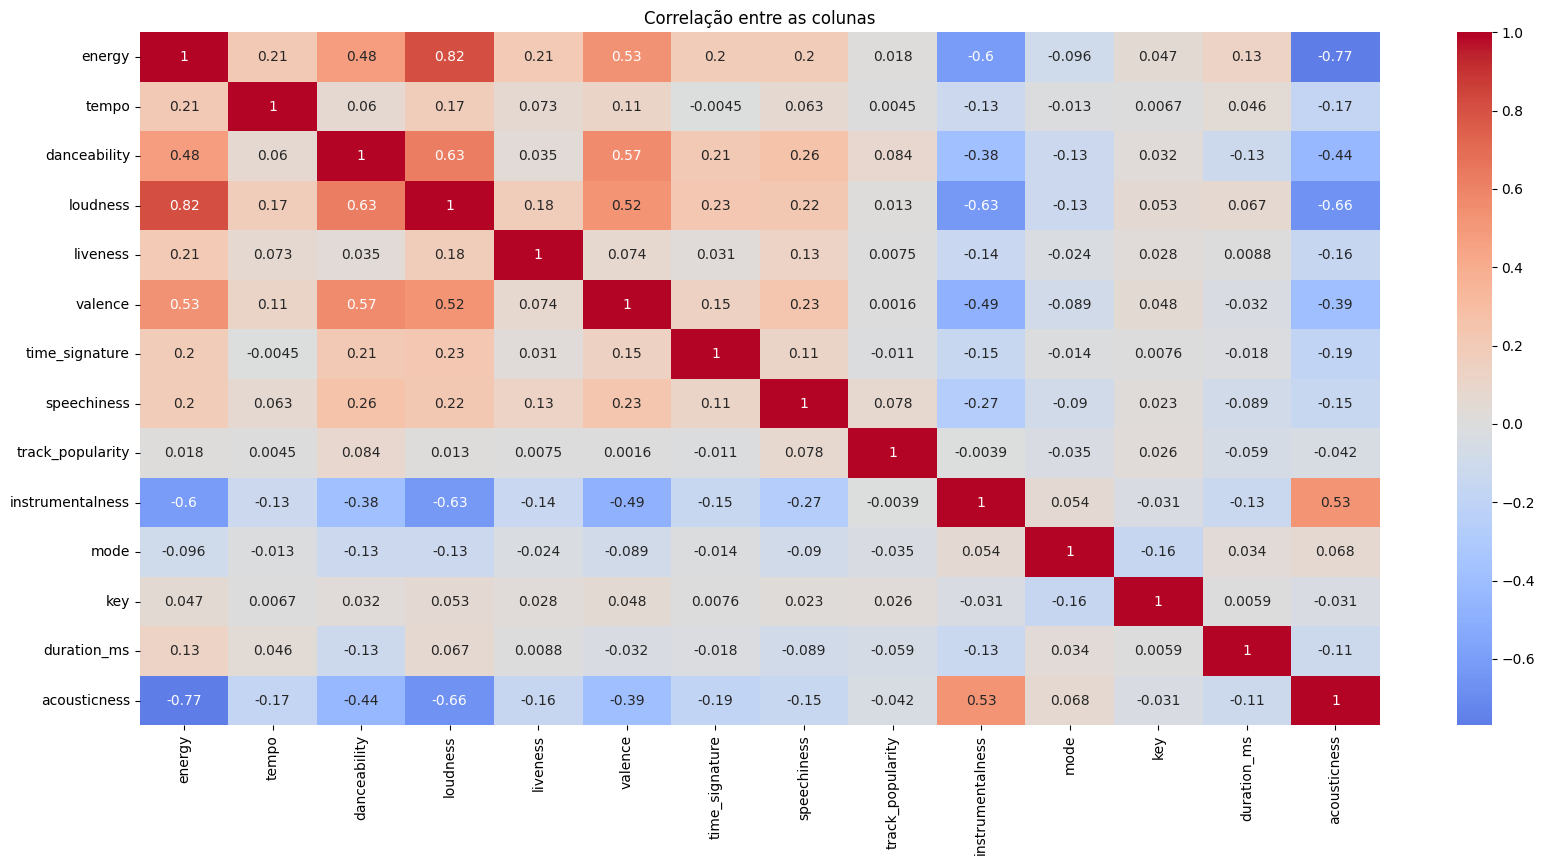

In [13]:
# Depois de limpar as colunas que não são numéricas e a data de lançamento da música, podemos criar um mapa de calor para relacionar as variáveis.
corr_low = df_low_popular[[
    'energy', 'tempo', 'danceability', 'loudness', 'liveness',
    'valence', 'time_signature', 'speechiness', 'track_popularity',
    'instrumentalness', 'mode',
    'key', 'duration_ms', 'acousticness',
    ]].corr()

#Exibir mapa de calor
plt.figure(figsize=(20,9))
sns.heatmap(corr_low, annot=True, cmap='coolwarm', center=0)
plt.title('Correlação entre as colunas')
plt.show()

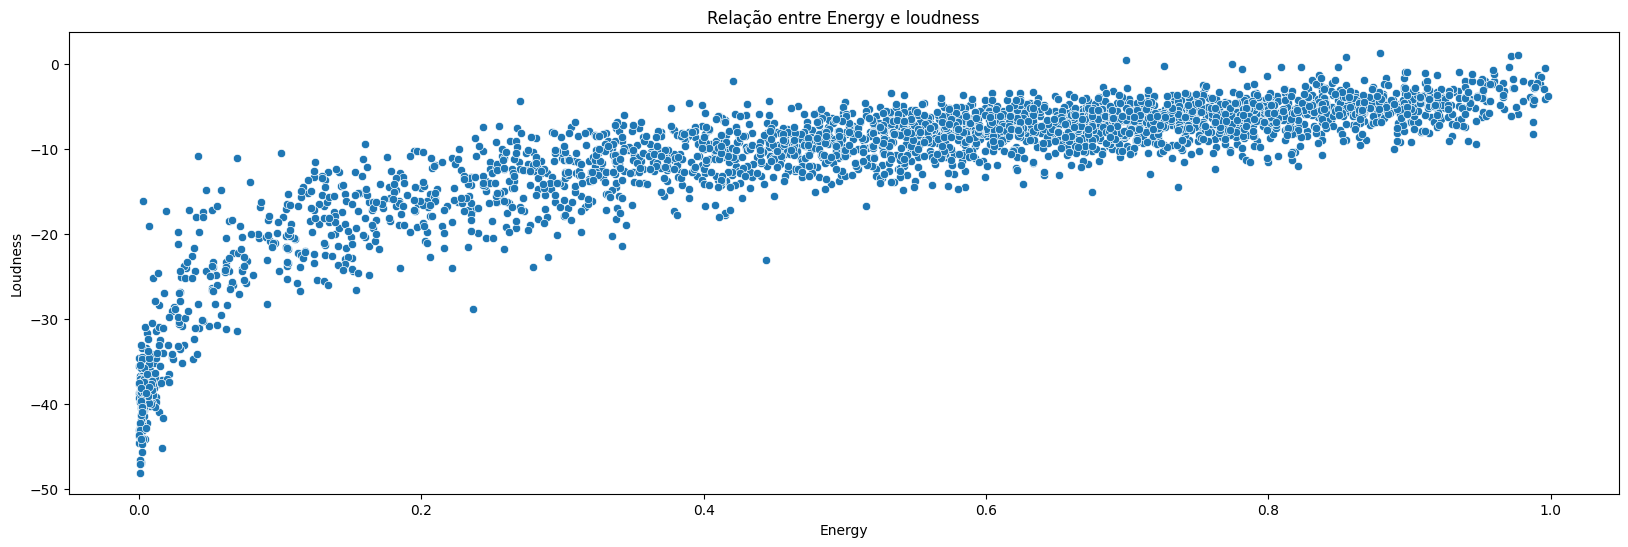

In [14]:
# Relação entre loudness e energy
plt.figure(figsize=(20, 6))
sns.scatterplot(x='energy', y='loudness', data=df_low_popular)
plt.title('Relação entre Energy e loudness')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.show()